# Graph Analysis Assignment
- Presented by Mukhtadir Syed

![convert notebook to web app](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/IMDB_Logo_2016.svg/2560px-IMDB_Logo_2016.svg.png)



## Objective
- We have a IMDB movie dataset with details of actors and we will leverage on networkx library to do some graph analysis
- A set of 14 questions will be answered

## Importing all the Libraries 

In [44]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
pd.options.display.max_colwidth = 100
pd.set_option('display.max_rows', None)
from IPython.display import Image
from IPython.core.display import HTML 


### Loading the Datasets

In [2]:
actor_edges_df=pd.read_csv('imdb_actor_edges_sol.csv', sep=';')
actor_edges_df.head()

,from,to,weight
0,n17776,n17778,6
1,n5578,n9770,3
2,n5578,n929,2
3,n5578,n9982,2
4,n1835,n6278,2


In [3]:
actor_key_df=pd.read_csv('imdb_actors_key_sol.csv', sep=';')
actor_key_df.head()

,id,ActorName,movies_95_04,main_genre,genres
0,n15629,"Rudder, Michael (I)",12,Thriller,"Action:1,Comedy:1,Drama:1,Fantasy:1,Horror:1,NULL:2,Romance:1,Sci-Fi:1,Thriller:2,War:1"
1,n5026,"Morgan, Debbi",16,Drama,"Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3,Romance:2"
2,n11252,"Bellows, Gil",33,Drama,"Comedy:6,Documentary:1,Drama:7,Family:1,Fantasy:1,Horror:1,Mystery:2,NULL:2,Romance:6,Short:2,Th..."
3,n5150,"Dray, Albert",20,Comedy,"Comedy:6,Crime:1,Documentary:1,Drama:4,NULL:5,Romance:1,Short:1,Thriller:1"
4,n4057,"Daly, Shane (I)",18,Drama,"Comedy:2,Crime:1,Drama:7,Horror:1,Music:1,Musical:1,Romance:1,Thriller:4"


### Creating the Graph using networkx library

In [4]:
g=nx.from_pandas_edgelist(actor_edges_df,'from','to')
# g=nx.from_pandas_edgelist(actor_edges_df,'from','to', edge_attr='weight') incase graph needs to be created with weighted edges



In [5]:
nx.set_node_attributes(g, actor_key_df.to_dict('dict')) 



# Analysis and Questions

**1. how many nodes are there**

In [6]:
nodes=g.number_of_nodes()
nodes

17577

**2. how many edges are there**

In [7]:
edges=g.number_of_edges()
edges

287074

**3. How does this distributions look like?**

In [8]:
degrees=g.degree()

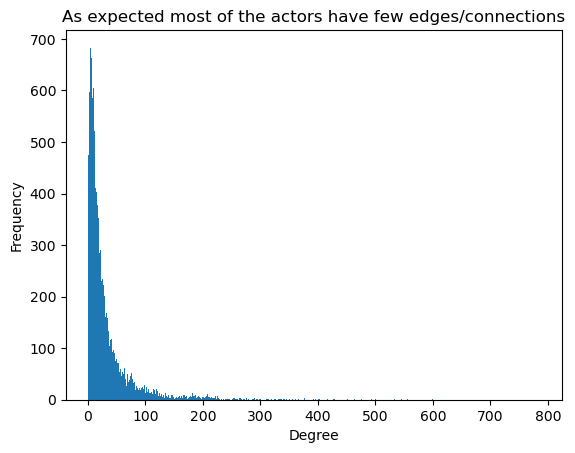

In [9]:
degree_sequence = [d for n, d in degrees]
degree_count = Counter(degree_sequence)
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence)+2))
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("As expected most of the actors have few edges/connections")
plt.show()


### Analyse the degree distribution. Compute the total degree distribution.


**4. What is the maximum degree?**

In [10]:
#4
degree_sequence = sorted((d for n, d in degrees), reverse=True)
dmax = max(degree_sequence)
dmax

784

**5. What is the minum degree?**

In [11]:
#5
dmin = min(degree_sequence)
dmin


1

**6. What is the diameter of the graph?**

In [12]:
if nx.is_connected(g):
    print('Graph is connected')
    diameter = nx.diameter(g)
else:
    print('Graph is NOT connected hence using subgraph method')
    sub_graphs = nx.connected_components(g)
    max_component = max(sub_graphs, key=len)

    # Create a "subgraph" of just the largest component.  Then calculate the diameter of the subgraph
    diameter = nx.diameter(g.subgraph(max_component))

print(diameter)

Graph is NOT connected hence using subgraph method
16


**7. What is the avg path length of the graph?**

In [13]:
# Create a "subgraph" of just the largest component.  Then calculate the average shortest path length of the subgraph
avg_shortest_path_length = nx.average_shortest_path_length(g.subgraph(max_component))

print(avg_shortest_path_length)

4.890557890566182


In [14]:
for C in (g.subgraph(c).copy() for c in nx.connected_components(g)):
    print(nx.average_shortest_path_length(C))
#just printing all the lengths here

1.0
4.890557890566182
1.9090909090909092
3.3011363636363638
1.0
3.225296442687747
1.0
1.3333333333333333
3.329004329004329
1.0
1.0
1.0
1.0
1.0
1.0
1.3333333333333333
1.0
1.0
1.0


**8. Who is the actor with highest degree centrality?**

In [15]:
max_node = max(degrees, key=lambda x: x[1])[0]
actor_key_df[actor_key_df['id']==max_node]


,id,ActorName,movies_95_04,main_genre,genres
12147,n162,"Davis, Mark (V)",540,Adult,"Action:1,Adult:429,Comedy:3,Crime:1,Documentary:5,Drama:6,Fantasy:1,NULL:92,Sci-Fi:1,Short:1"


#### Before moving ahead we will add the Graph Analysis done to our Dataframe

In [16]:
actor_key_df['Degree_Centrality']=actor_key_df['id'].map(dict(degrees))

In [17]:
actor_key_df.sort_values('Degree_Centrality',ascending=False).head(100)

,id,ActorName,movies_95_04,main_genre,genres,Degree_Centrality
12147,n162,"Davis, Mark (V)",540,Adult,"Action:1,Adult:429,Comedy:3,Crime:1,Documentary:5,Drama:6,Fantasy:1,NULL:92,Sci-Fi:1,Short:1",784
1761,n1743,"Sanders, Alex (I)",467,Adult,"Action:1,Adult:380,Adventure:1,Comedy:2,Documentary:7,Drama:3,NULL:65,Sci-Fi:3,Short:2,Thriller:3",610
13442,n1754,"North, Peter (I)",460,Adult,"Action:1,Adult:389,Documentary:5,Drama:5,NULL:55,Sci-Fi:3,Short:1,Thriller:1",599
11272,n1802,"Marcus, Mr.",435,Adult,"Adult:343,Crime:1,Documentary:2,NULL:86,Short:1,Thriller:2",584
4092,n407,"Tedeschi, Tony",364,Adult,"Adult:286,Adventure:1,Comedy:1,Documentary:2,Drama:5,Fantasy:1,NULL:63,Romance:2,Sci-Fi:1,Short:...",561
8354,n164,"Dough, Jon",300,Adult,"Adult:248,Adventure:1,Comedy:1,Documentary:1,Drama:5,NULL:34,Sci-Fi:8,Short:2",555
5968,n179,"Stone, Lee (II)",403,Adult,"Adult:310,Comedy:1,Documentary:1,Fantasy:2,NULL:87,Romance:1,Thriller:1",545
2236,n176,"Voyeur, Vince",370,Adult,"Action:1,Adult:303,Comedy:3,Crime:1,Documentary:3,Drama:1,NULL:50,Sci-Fi:3,Short:3,Thriller:2",533
5752,n175,"Lawrence, Joel (II)",315,Adult,"Adult:257,Comedy:1,Documentary:1,Musical:1,NULL:53,Sci-Fi:1,Short:1",500
15511,n160,"Steele, Lexington",429,Adult,"Adult:340,Comedy:1,Documentary:4,Drama:1,Fantasy:1,Horror:1,NULL:80,Thriller:1",493


#### We will now take the genres column and create new columns for each genre count

In [18]:
def split_key_value(string):
    pairs = [pair.split(':') for pair in string.split(',')]
    return dict(pairs)

new_df = actor_key_df['genres'].apply(split_key_value).apply(pd.Series)

actor_key_df = actor_key_df.join(new_df)

In [19]:
actor_key_df=actor_key_df.fillna(0)

In [20]:
actor_key_df['total_genres']=actor_key_df.iloc[:,6:].astype(bool).sum(axis=1)


**9. How do you explain the high degree of the top-20 list??**

In [21]:
(actor_key_df.sort_values('Degree_Centrality', ascending=False)
 .head(20)
 .groupby('main_genre')['id']
 .nunique())

main_genre
Adult     19
Family     1
Name: id, dtype: int64

In [22]:
# Degree Centyrality is highly correlated with number of movies acted in
actor_key_df[['movies_95_04','Degree_Centrality']].corr()

,movies_95_04,Degree_Centrality
movies_95_04,1.000000,0.787587
Degree_Centrality,0.787587,1.000000


9. **Answer- It seems Adult actors have high degree centrality as in Adult films actors tend to perform with a lot of different actors. Also, adult film actors also tend to act in a lot more movies than traditional actors**

**10. Who is the actor with highest betweenes?**

In [24]:
between=nx.betweenness_centrality(g) # computing betweenness centrality

In [25]:
max_between_node=max(between, key=between.get)
actor_key_df[actor_key_df['id']==max_between_node]



,id,ActorName,movies_95_04,main_genre,genres,Degree_Centrality,Action,Comedy,Drama,Fantasy,...,Mystery,Short,Crime,Music,Musical,Adventure,Adult,Animation,Western,total_genres
10548,n2108,"Jeremy, Ron",280,Adult,"Adult:149,Adventure:1,Animation:1,Comedy:15,Documentary:26,Drama:15,Horror:9,Music:2,Musical:1,N...",471,0,15,15,0,...,0,4,0,2,1,1,149,1,0,14


In [26]:
actor_key_df['Betweenness_Centrality']=actor_key_df['id'].map(between) #adding the betweenness Centrality of each actor to the dataframe




**11. How do you explain the high betweenness of the top-20 list?**

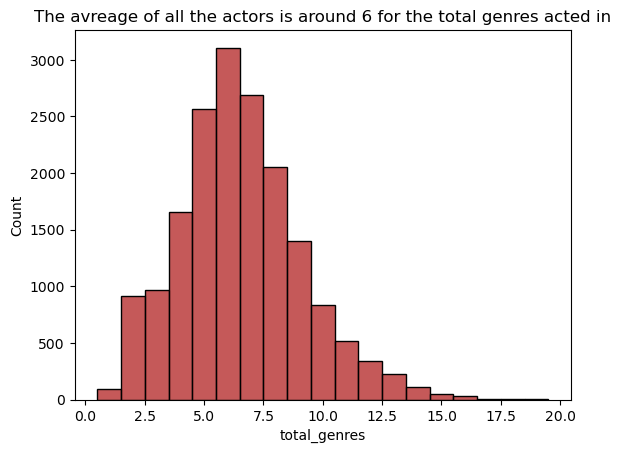

In [27]:
sns.histplot(actor_key_df['total_genres'],discrete=True,color='firebrick')
plt.title("The avreage of all the actors is around 6 for the total genres acted in")
plt.show()

In [28]:
# here is the total genres acted in by the top 20 betweenness centrality
actor_key_df.sort_values('Betweenness_Centrality', ascending=False).head(20)[['id','total_genres']]

,id,total_genres
10548,n2108,14
4693,n3284,12
2563,n564,13
14433,n14458,9
15720,n17308,9
17458,n285,11
8799,n13723,13
10412,n1529,14
5517,n5083,12
15894,n1923,6


In [29]:
# Average Total Genres of the top 20 Betweenness Centrality
actor_key_df.sort_values('Betweenness_Centrality', ascending=False).head(20)['total_genres'].mean()

11.3

**11. Answer- It seems the actors with high betweenness have acted in a lot of different genres connecting different nodes**

**12. Who is the actor with highest closeness centrality?**

In [30]:
closeness=nx.closeness_centrality(g) # computing closeness centrality of all the actors

In [31]:
max_closeness_node=max(closeness, key=closeness.get)
actor_key_df[actor_key_df['id']==max_closeness_node]

,id,ActorName,movies_95_04,main_genre,genres,Degree_Centrality,Action,Comedy,Drama,Fantasy,...,Short,Crime,Music,Musical,Adventure,Adult,Animation,Western,total_genres,Betweenness_Centrality
10412,n1529,"Jackson, Samuel L.",97,Drama,"Action:3,Adventure:1,Comedy:3,Crime:3,Documentary:34,Drama:13,Family:8,Fantasy:1,Music:5,Mystery...",427,3,3,13,1,...,7,3,5,0,1,0,0,0,14,0.016443


**13. How do you explain the high closeness of the top-20 list?**

In [32]:
# Adding closeness centrality to our dataframe for each actor

actor_key_df['Closeness_Centrality']=actor_key_df['id'].map(closeness)

In [33]:
actor_key_df.sort_values('Closeness_Centrality', ascending=False).head(20)

,id,ActorName,movies_95_04,main_genre,genres,Degree_Centrality,Action,Comedy,Drama,Fantasy,...,Crime,Music,Musical,Adventure,Adult,Animation,Western,total_genres,Betweenness_Centrality,Closeness_Centrality
10412,n1529,"Jackson, Samuel L.",97,Drama,"Action:3,Adventure:1,Comedy:3,Crime:3,Documentary:34,Drama:13,Family:8,Fantasy:1,Music:5,Mystery...",427,3,3,13,1,...,3,5,0,1,0,0,0,14,0.016443,0.307119
9655,n3213,"Goldberg, Whoopi",109,Comedy,"Adventure:3,Animation:1,Comedy:16,Documentary:35,Drama:11,Family:12,Fantasy:2,Music:9,Musical:1,...",398,0,16,11,2,...,0,9,1,3,0,1,0,14,0.013283,0.305624
8119,n3268,"Berry, Halle",63,Family,"Adventure:1,Comedy:2,Crime:1,Documentary:23,Drama:5,Family:8,Fantasy:3,Music:5,Mystery:1,NULL:6,...",376,0,2,5,3,...,1,5,0,1,0,0,0,14,0.008212,0.303781
3588,n503,"Diaz, Cameron",59,Drama,"Adult:1,Animation:1,Comedy:4,Crime:1,Documentary:14,Drama:7,Family:3,Music:4,Mystery:2,NULL:5,Ro...",361,0,4,7,0,...,1,4,0,0,1,1,0,13,0.009268,0.303547
4524,n701,"Hanks, Tom",75,Family,"Animation:3,Comedy:5,Documentary:32,Drama:6,Family:6,Fantasy:1,Music:5,Mystery:1,NULL:2,Romance:...",457,0,5,6,1,...,0,5,0,0,0,3,0,13,0.012802,0.303112
13804,n558,"Stiller, Ben",66,Comedy,"Animation:1,Comedy:16,Crime:2,Documentary:15,Drama:4,Family:4,Music:5,Mystery:2,NULL:2,Romance:5...",382,0,16,4,0,...,2,5,0,0,0,1,0,14,0.007472,0.302604
708,n3907,"Myers, Mike (I)",58,Comedy,"Adventure:2,Animation:1,Comedy:14,Documentary:12,Drama:3,Family:2,Music:11,NULL:6,Romance:1,Short:6",345,0,14,3,0,...,0,11,0,2,0,1,0,10,0.007682,0.300511
5907,n3308,"Douglas, Michael (I)",41,Family,"Comedy:1,Crime:1,Documentary:15,Drama:2,Family:4,Music:4,Mystery:1,NULL:3,Romance:1,Short:7,Thri...",263,0,1,2,0,...,1,4,0,0,0,0,0,11,0.008060,0.300505
3542,n2674,"Lopez, Jennifer (I)",68,Music,"Comedy:1,Crime:1,Documentary:16,Drama:4,Family:6,Fantasy:1,Music:25,NULL:7,Romance:3,Short:3,Thr...",410,0,1,4,1,...,1,25,0,0,0,0,0,11,0.004832,0.299126
14241,n756,"De Niro, Robert",51,Comedy,"Animation:1,Comedy:7,Crime:1,Documentary:13,Drama:7,Family:3,Horror:1,Music:4,NULL:3,Sci-Fi:1,Sh...",257,0,7,7,0,...,1,4,0,0,0,1,0,13,0.007117,0.298621


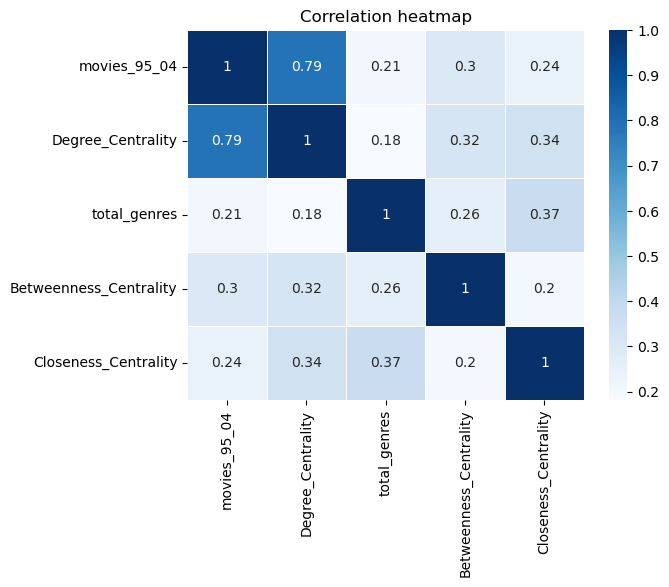

In [34]:
# cororelation matrix

import seaborn as sns

sns.heatmap(actor_key_df[['movies_95_04','Degree_Centrality','total_genres','Betweenness_Centrality','Closeness_Centrality']].corr(),cmap='Blues',annot=True,linewidths=.5)
plt.title("Correlation heatmap")
plt.show()





In [35]:
#Average total different genres acted in
actor_key_df.sort_values('Closeness_Centrality', ascending=False).head(20)['total_genres'].mean()

12.45

**13. Answer- There seems to be 2 characteristics of the top 20 list. Firstly, once again actors who have acted in a lot of different genres would be close to all other nodes and secondly you see all the big hollywood names in the top 20 list of closeness centrality indicating that these actors have acted with other popular actors which gives them influence as well as that is one of the characteristic of high closeness centrality**

**14. (Optional but recommended): Obtain the distribution of the number of movies made by an actor and the number of genres in which an actor starred in. It may be useful to analyze and discuss the results to be obtained in the following exercises.**

**Answer- We have already used this information above, just getting the distribution here again**

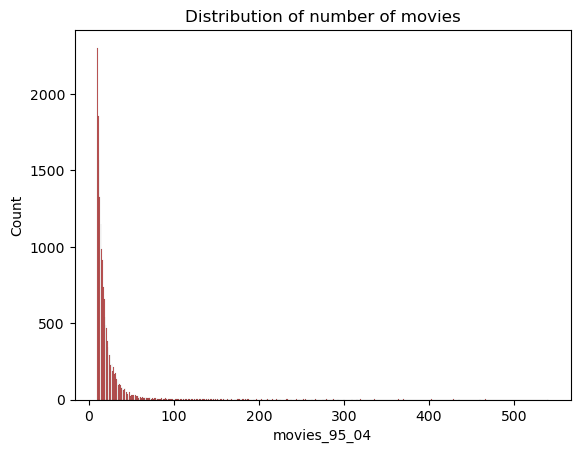

In [36]:
sns.histplot(actor_key_df['movies_95_04'],color='firebrick')
plt.title("Distribution of number of movies")
plt.show()

In [37]:
actor_key_df['movies_95_04'].describe().to_frame()

,movies_95_04
count,17577.000000
mean,20.545258
std,20.686926
min,10.000000
25%,12.000000
50%,15.000000
75%,22.000000
max,540.000000


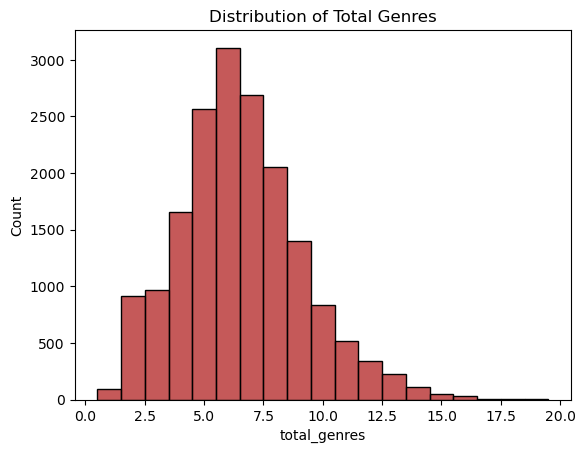

In [38]:
sns.histplot(actor_key_df['total_genres'], discrete=True,color='firebrick')
plt.title("Distribution of Total Genres")
plt.show()

In [39]:
actor_key_df['total_genres'].describe().to_frame()

,total_genres
count,17577.000000
mean,6.536269
std,2.602115
min,1.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,19.000000
